In [4]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

sns.set_theme()

In [5]:
shots         = 128
num_qubits    = 2
num_layers    = 1
num_epochs    = 10
num_batch     = 5

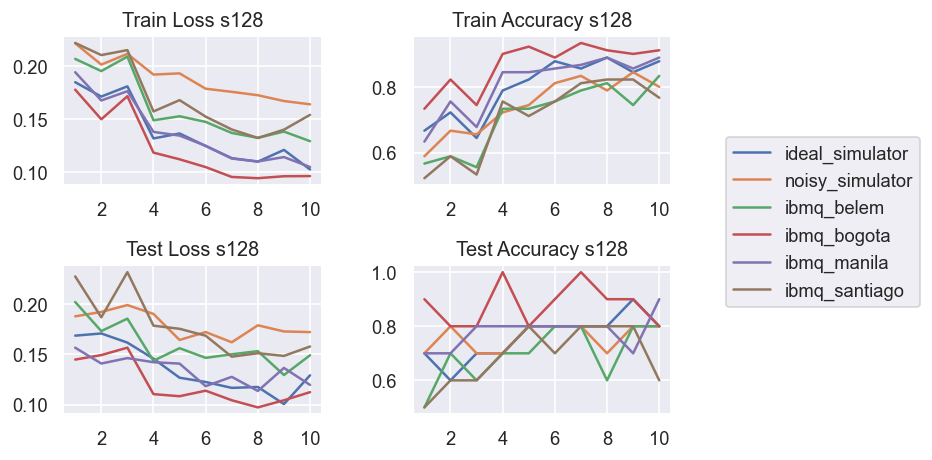

In [6]:
fig, ax = plt.subplots(2,2, dpi=120)
ax[0][0].set_title(f"Train Loss s{shots}")
ax[1][0].set_title(f"Test Loss s{shots}")
ax[0][1].set_title(f"Train Accuracy s{shots}")
ax[1][1].set_title(f"Test Accuracy s{shots}")
plt.tight_layout()

for i in range(2):
    for j in range(2):
        ax[i][j].set_xticks([0,2,4,6,8,10])
        # ax[i][j].set_ylim([0.1,0.25])

file_prefix = [
    "ideal_simulator", 
    "noisy_simulator", 
    "ibmq_belem", 
    "ibmq_bogota",
    "ibmq_manila", 
    "ibmq_santiago"
    ]

for prefix in file_prefix:
    npy_record = f"result_npy/record_{prefix}_q{num_qubits}_l{num_layers}_b{num_batch}_s{shots}.npy"
    record = np.load(npy_record, allow_pickle=True).item()
    # ['loss_train', 'loss_test', 'accuracy_train', 'accuracy_test']
    ax[0][0].plot([i+1 for i in range(10)], record['loss_train'], )
    ax[0][1].plot([i+1 for i in range(10)], record['accuracy_train'], label=prefix)
    ax[0][1].legend(loc='center right', bbox_to_anchor=(2, -0.25))
    ax[1][0].plot([i+1 for i in range(10)], record['loss_test'])
    ax[1][1].plot([i+1 for i in range(10)], record['accuracy_test'])